In [4]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.datasets import mnist
import keras.callbacks as cb
from matplotlib import pyplot as plt

In [5]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)
        
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')

In [6]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(60000, 28, 28, 1)


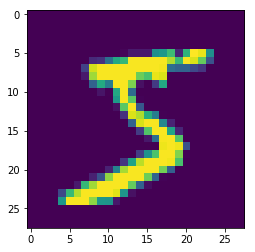

In [7]:
print(X_train.shape)
# (60000, 28, 28)

plt.imshow(X_train[0])

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
# (60000, 28, 28, 1)

In [8]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
print(y_train.shape)
# (60000,)

print(y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)
# (60000, 10)

print(Y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
history = LossHistory()

model.fit(X_train, Y_train, callbacks=[history], batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.1988 - acc: 0.9392
Epoch 2/10
60000/60000 [==============================] - 346s 6ms/step - loss: 0.0742 - acc: 0.9788
Epoch 3/10
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0581 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0498 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0432 - acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0393 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.0332 - acc: 0.9901
Epoch 8/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0314 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 298s 5ms/step - loss: 0.0304 - acc: 0.9911
Epoch 10/10
60000/60000 [==============================] - 336s 6ms/step - loss: 0.0260 - a

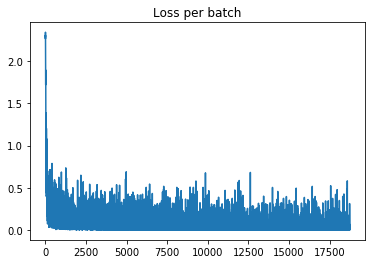

In [15]:
plot_losses(history.losses)

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 12s 1ms/step
[0.02084753474367608, 0.9935]
